# Telecom Churn Model

<font color='blue'>
    
Objectives :

1. To identify high value customers and to predict if they will churn or not
2. Identify the strong predictors of Churn
3. Recommend strategies to manage customer churn

In [289]:
# Importing all libraries that are needed to begin with -

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [290]:
import warnings
warnings.filterwarnings('ignore')   #ignore unwanted warnings

### Data understanding

<font color='blue'>
Let us import the data from CSV and perform basic inspection of the dataframe 

In [291]:
# reading data 
telecom_df = pd.read_csv('telecom_churn_data.csv',low_memory=False)   #... low_memory=False set to avoid errors
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [292]:
# Check info
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [293]:
# statistical property of the df
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [294]:
# shape of the dataframe
telecom_df.shape

(99999, 226)

### Data Cleaning

<font color='blue'>
Based on above inspections we have to handle missing values, remove unwanted data and features wherever applicable

In [295]:
# Check for missing values column-wise
telecom_df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

#### Handle Missing values
<font color='blue'>
    Lets check the % of missing values in each column

In [296]:
# A function can be created for repeat usability:

def missing_percentage(data):
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)].round()) # Returning values of nulls different of 0
        
    return

In [297]:
missing_percentage(telecom_df)

Total columns at least one Values: 
                          Total  Percent
count_rech_2g_6           74846     75.0
date_of_last_rech_data_6  74846     75.0
count_rech_3g_6           74846     75.0
av_rech_amt_data_6        74846     75.0
max_rech_data_6           74846     75.0
...                         ...      ...
last_date_of_month_8       1100      1.0
loc_ic_t2o_mou             1018      1.0
std_og_t2o_mou             1018      1.0
loc_og_t2o_mou             1018      1.0
last_date_of_month_7        601      1.0

[166 rows x 2 columns]


In [298]:
# Creating df for columns containing missing values and %
missing_df = pd.DataFrame(round(telecom_df.isnull().sum()/len(telecom_df.index),2)).reset_index().rename(columns={'index':'columns',0:'Null Percentage'})
missing_df.sort_values(['Null Percentage'],ascending=False)

,columns,Null Percentage
189,arpu_3g_6,0.75
177,av_rech_amt_data_6,0.75
157,date_of_last_rech_data_6,0.75
161,total_rech_data_6,0.75
165,max_rech_data_6,0.75
...,...,...
146,max_rech_amt_7,0.00
145,max_rech_amt_6,0.00
144,total_rech_amt_9,0.00
143,total_rech_amt_8,0.00


<font color='blue'>
    
   Since we have many columns with missing values as high as 75% lets handle these columns :

In [299]:
high_null_val = missing_df[missing_df['Null Percentage'] >= 0.74]['columns'].tolist()
high_null_val  # columns seperated out where high missing value %

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [300]:
cols_to_retain = ['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']
cols_to_drop = [i for i in high_null_val if i not in cols_to_retain]
cols_to_drop # list of columns to be dropped 

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [301]:
telecom_df = telecom_df.drop(cols_to_drop,axis=1)
telecom_df.shape  # refined dataframe 

(99999, 190)

In [302]:
# checking null percentage after removing the col with high null %
missing_percentage(telecom_df)

Total columns at least one Values: 
                      Total  Percent
av_rech_amt_data_6    74846     75.0
total_rech_data_6     74846     75.0
av_rech_amt_data_7    74428     74.0
total_rech_data_7     74428     74.0
loc_ic_t2t_mou_9       7745      8.0
offnet_mou_9           7745      8.0
loc_og_t2f_mou_9       7745      8.0
roam_ic_mou_9          7745      8.0
std_ic_mou_9           7745      8.0
std_og_t2t_mou_9       7745      8.0
roam_og_mou_9          7745      8.0
loc_og_t2c_mou_9       7745      8.0
og_others_9            7745      8.0
spl_ic_mou_9           7745      8.0
isd_og_mou_9           7745      8.0
loc_og_t2t_mou_9       7745      8.0
isd_ic_mou_9           7745      8.0
ic_others_9            7745      8.0
loc_og_t2m_mou_9       7745      8.0
std_ic_t2o_mou_9       7745      8.0
spl_og_mou_9           7745      8.0
std_ic_t2f_mou_9       7745      8.0
std_og_t2m_mou_9       7745      8.0
loc_ic_t2f_mou_9       7745      8.0
loc_og_mou_9           7745      8.0
lo

In [303]:
# Imputing the rest of the missing values with 0
telecom_df.fillna(value=0,inplace=True)

In [304]:
# final check for null values

telecom_df.isnull().any().sum()

0

<font color='blue'>
Thus we have a dataframe free from missing values.

#### Removing Redundant Features

In [305]:
# Check for columns having one unique value
for i in telecom_df.columns:
    if (telecom_df[i].nunique() == 1):
        print(i, telecom_df[i].unique())

circle_id [109]
loc_og_t2o_mou [0.]
std_og_t2o_mou [0.]
loc_ic_t2o_mou [0.]
last_date_of_month_6 ['6/30/2014']
std_og_t2c_mou_6 [0.]
std_og_t2c_mou_7 [0.]
std_og_t2c_mou_8 [0.]
std_og_t2c_mou_9 [0.]
std_ic_t2o_mou_6 [0.]
std_ic_t2o_mou_7 [0.]
std_ic_t2o_mou_8 [0.]
std_ic_t2o_mou_9 [0.]


In [306]:
# Dropping columns with one unique value
telecom_df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
        'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
         'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9',
        'circle_id'], axis=1, inplace= True)

In [307]:
#columns with date fields
date_cols = telecom_df.columns[telecom_df.columns.str.contains('date')].tolist()
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [308]:
# Removing date columns as no impact in churn prediction
telecom_df = telecom_df.drop(date_cols,axis=1)
telecom_df.shape

(99999, 170)

In [309]:
# Remove mobile_number which have no impact on churn
telecom_df = telecom_df.drop('mobile_number',1)
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


### Data Preparation

<font color='blue'>

#### Derieved Features

Below features can be derieved from the existing dataset for our analysis:
- 1. Average revenue per person in good month
- 2. Customer age group based on age on network
- 3. Minutes to call center in good month

In [310]:
# Derived Column 1: Average Revenue Per Person in Good Months (numerical)
telecom_df['arpu_goodmonths']=(telecom_df['arpu_6']+telecom_df['arpu_7'])/2
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,968,30.4,0.0,101.20,3.58,206.1005
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,0,0,0,1006,0.0,0.0,0.00,0.00,194.5605
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,0,0,0,1103,0.0,0.0,4.17,0.00,178.3740
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,0,0,0,2491,0.0,0.0,0.00,0.00,236.2200
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0,0,0,1526,0.0,0.0,0.00,0.00,285.7560


In [311]:
pd.set_option('display.max_rows', 150) #This will let us see all rows

In [312]:
# Customer Group based on Age on Network (categorical)
old = telecom_df['aon'].quantile(0.75)
mid = telecom_df['aon'].mean()
new = telecom_df['aon'].quantile(0.25)

def age_on_network(x):
    if x >= old:
        cust_grp = 'Very Old'
    elif x >= mid and x < old :
        cust_grp = 'Old'
    elif x >= new and x < mid:
        cust_grp = 'New'
    else:
        cust_grp = 'Just Joined'
    return cust_grp

telecom_df['cust_group'] = telecom_df['aon'].apply(age_on_network)
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,cust_group
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,968,30.4,0.0,101.20,3.58,206.1005,New
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,0,0,1006,0.0,0.0,0.00,0.00,194.5605,New
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,0,0,1103,0.0,0.0,4.17,0.00,178.3740,New
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,0,0,2491,0.0,0.0,0.00,0.00,236.2200,Very Old
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0,0,1526,0.0,0.0,0.00,0.00,285.7560,Old


In [313]:
telecom_df['cust_group'].value_counts()   # Checking count of each customer group

New            37965
Very Old       25000
Just Joined    24927
Old            12107
Name: cust_group, dtype: int64

In [314]:
# Minutes to Call Center in Good Months  
telecom_df['mins_callcenter']=telecom_df['loc_og_t2c_mou_6']+telecom_df['loc_og_t2c_mou_7']
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,cust_group,mins_callcenter
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,968,30.4,0.0,101.20,3.58,206.1005,New,0.00
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,0,1006,0.0,0.0,0.00,0.00,194.5605,New,2.91
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,0,1103,0.0,0.0,4.17,0.00,178.3740,New,135.54
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,0,2491,0.0,0.0,0.00,0.00,236.2200,Very Old,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0,1526,0.0,0.0,0.00,0.00,285.7560,Old,0.00


<font color='blue'>
    
As we have to focus on High Value customers let us get a list of them.
### Filter high-value customers:

In [315]:
telecom_df['tot_call_rech_goodMonths']=telecom_df['total_rech_amt_6']+telecom_df['total_rech_amt_7']
telecom_df['tot_data_rech_goodMonths']=(telecom_df['total_rech_data_6']*telecom_df['av_rech_amt_data_6'])+(telecom_df['total_rech_data_7']*telecom_df['av_rech_amt_data_7'])
telecom_df['avg_rech_goodMonths']=(telecom_df['tot_call_rech_goodMonths']+telecom_df['tot_data_rech_goodMonths'])/2

In [316]:
# length after filtering out high valued customers
len(telecom_df[telecom_df['avg_rech_goodMonths'] >= round(telecom_df['avg_rech_goodMonths'].quantile(0.7))].index)

30001

In [317]:
# filtering out high value customer based on 70th percentile of the average recharge amount in the first two months
high_value_cust = telecom_df[telecom_df['avg_rech_goodMonths'] >= round(telecom_df['avg_rech_goodMonths'].quantile(0.7))]
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,cust_group,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,30.40,0.00,101.20,3.58,206.1005,New,0.0,614,504.0,559.0
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,57.74,19.38,18.74,0.00,1209.5150,New,0.0,2370,0.0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,21.03,910.65,122.16,0.00,435.4720,Just Joined,0.0,1038,354.0,696.0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0.00,0.00,0.00,0.00,556.1030,New,0.0,1280,0.0,640.0
23,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,...,40.45,51.86,0.00,0.00,134.1235,New,0.0,454,712.0,583.0


#### Tag churners and remove attributes of the churn phase

In [318]:
high_value_cust['Churn'] = (high_value_cust['total_ic_mou_9'] == 0) & (high_value_cust['total_og_mou_9'] == 0) \
                             & (high_value_cust['vol_2g_mb_9'] == 0) & (high_value_cust['vol_3g_mb_9'] == 0)
high_value_cust['Churn'] = high_value_cust['Churn'].apply(lambda x : 1 if x else 0)
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,cust_group,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths,Churn
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,101.20,3.58,206.1005,New,0.0,614,504.0,559.0,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,19.38,18.74,0.00,1209.5150,New,0.0,2370,0.0,1185.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,910.65,122.16,0.00,435.4720,Just Joined,0.0,1038,354.0,696.0,0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0.00,0.00,0.00,556.1030,New,0.0,1280,0.0,640.0,0
23,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,...,51.86,0.00,0.00,134.1235,New,0.0,454,712.0,583.0,0


#### Visualizing Churn % for high value customer

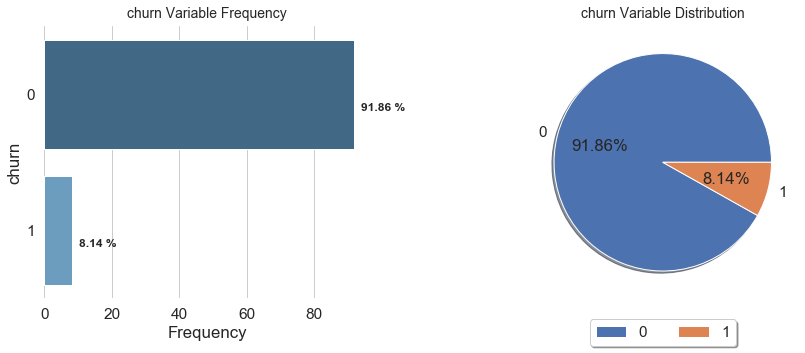

In [319]:
ser_churn = np.round((high_value_cust["Churn"].dropna().value_counts()/len(high_value_cust["Churn"]))*100,2)

plt.figure(figsize=(14,5))
sns.set_style("whitegrid")
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.box(on=None)
ax1 = sns.barplot(x=ser_churn.values, y=ser_churn.index, orient="h", palette=("Blues_d"))
plt.title("churn Variable Frequency", size=14, y=1.01)
plt.ylabel("churn")
plt.xlabel("Frequency")
ax1.grid(True, axis="x")
for i in ax1.patches:
    ax1.text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
plt.subplot(grid[0, 1])
plt.pie(ser_churn.values, labels=ser_churn.index, autopct='%1.2f%%',shadow=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
ax = plt.title("churn Variable Distribution", size=14, y=1.01)

<font color='blue'>
Majority of the high value customer didn't churn while 8.14 % of high value customer churned.
This imbalance has to be addressed when we are preparing our model.

In [320]:
churn_cols = high_value_cust.columns[high_value_cust.columns.str.contains('_9')].tolist()
churn_cols  # We do not need these columns for our next analysis

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [321]:
high_value_cust = high_value_cust.drop(churn_cols,axis=1)
high_value_cust.shape  #dataframe for high value customers

(30001, 136)

In [322]:
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,cust_group,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,101.20,3.58,206.1005,New,0.0,614,504.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,19.38,18.74,0.00,1209.5150,New,0.0,2370,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,910.65,122.16,0.00,435.4720,Just Joined,0.0,1038,354.0,696.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,0.00,0.00,556.1030,New,0.0,1280,0.0,640.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,51.86,0.00,0.00,134.1235,New,0.0,454,712.0,583.0,0



<font color='blue'>
    
 Now we have our dataframe ready for analysis. Lets start with Exploratory data analysis to identify trends and patterns in the dataset.

### EDA

In [323]:
# Taking numeric columns
high_value_cust_numeric = high_value_cust.select_dtypes(exclude=['object'])
high_value_cust_numeric.head()  #all numeric columns

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,30.40,0.00,101.20,3.58,206.1005,0.0,614,504.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,57.74,19.38,18.74,0.00,1209.5150,0.0,2370,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,21.03,910.65,122.16,0.00,435.4720,0.0,1038,354.0,696.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,0.00,0.00,0.00,556.1030,0.0,1280,0.0,640.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,40.45,51.86,0.00,0.00,134.1235,0.0,454,712.0,583.0,0


In [324]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(high_value_cust_numeric, 10).round(2)) # to get the correlations amongst columns

Top Absolute Correlations
arpu_goodmonths           tot_call_rech_goodMonths    0.98
arpu_8                    total_rech_amt_8            0.96
arpu_6                    total_rech_amt_6            0.95
arpu_7                    total_rech_amt_7            0.94
isd_og_mou_7              isd_og_mou_8                0.94
tot_data_rech_goodMonths  avg_rech_goodMonths         0.93
isd_og_mou_6              isd_og_mou_8                0.92
arpu_7                    arpu_goodmonths             0.92
isd_og_mou_6              isd_og_mou_7                0.92
arpu_6                    arpu_goodmonths             0.91
dtype: float64


<font color='blue'>
    
   Using a scatter plot we can also analyze the importance of a feature in the process of churning.
   
   Lets do it for :
   1. Average Recharge in good months
   2. Minutes calls to callcentre
   3. Outgoing calls
   4. Incoming calls

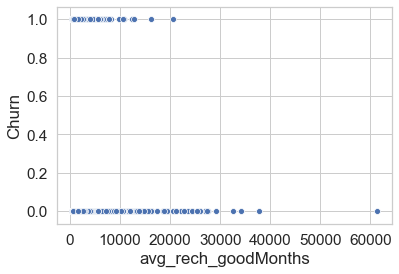

In [325]:
sns.scatterplot(high_value_cust['avg_rech_goodMonths'],high_value_cust['Churn'])
plt.show()

<font color='blue'>
    Clearly When recharge is more the probability of churn is less

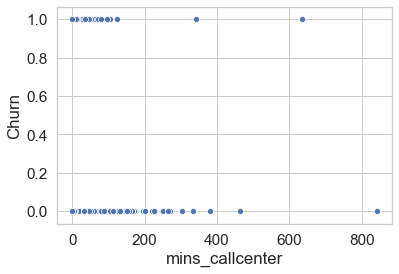

In [326]:
sns.scatterplot(high_value_cust['mins_callcenter'],high_value_cust['Churn'])
plt.show()

<font color='blue'>
Higher minutes with Call centre lower the churn probability

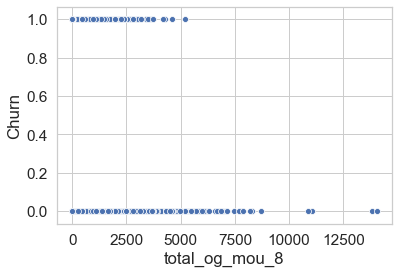

In [327]:
sns.scatterplot(high_value_cust['total_og_mou_8'],high_value_cust['Churn'])
plt.show()

<font color='blue'>
    Higher outgoing mins of usage lesser is the probability of churn

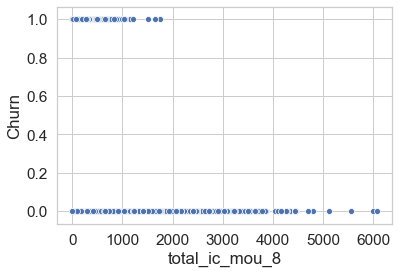

In [328]:
sns.scatterplot(high_value_cust['total_ic_mou_8'],high_value_cust['Churn'])
plt.show()

<font color='blue'>
Higher the incoming mins usage lower is the churn probability
    
    
Let us also check with the metric of Average Revenue per user :

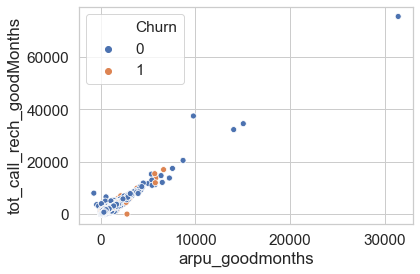

In [329]:
sns.scatterplot(high_value_cust['arpu_goodmonths'],
                high_value_cust['tot_call_rech_goodMonths'],hue=high_value_cust['Churn'])
plt.show()

<font color='blue'>
Churns are likely to happen when avg revenue/user is less

#### Churn/No-churn based on Customer group

In [330]:
# customer group df for reference
cust_grp_df = high_value_cust.groupby(['cust_group','Churn']).size().reset_index().rename(columns={0:'Number of Customers'})
cust_grp_df

,cust_group,Churn,Number of Customers
0,Just Joined,0,6767
1,Just Joined,1,904
2,New,0,10324
3,New,1,1069
4,Old,0,3465
5,Old,1,200
6,Very Old,0,7004
7,Very Old,1,268


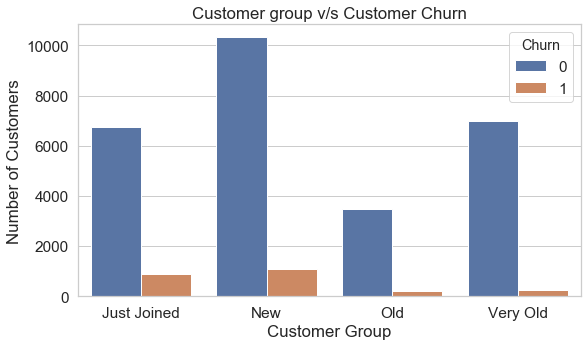

In [331]:
plt.figure(figsize=(9,5))
ax = sns.barplot(data=cust_grp_df,x='cust_group',y='Number of Customers',hue='Churn')
ax.set_title('Customer group v/s Customer Churn')
ax.set_xlabel('Customer Group')
ax.set_ylabel('Number of Customers')
plt.show()

<font color='blue'>
    
- Churn % is higher in customers who just joined or are new
- Churn % is lower for customers who are associated with the brand for a longer time (Loyal Customers)

## Model Building 

<font color='blue'>
Let us first create the dummy variables for all categorical variables:

In [332]:
# Creating dummy variables for the categorical variable 'cust_group'
ml = pd.get_dummies(high_value_cust['cust_group'], prefix='cust_group',drop_first=True)

#Adding the results to the master dataframe
high_value_cust = pd.concat([high_value_cust,ml], axis=1)
high_value_cust = high_value_cust.drop('cust_group',1)
high_value_cust.head() #check if the dummies are created correctly

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sep_vbc_3g,arpu_goodmonths,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths,Churn,cust_group_New,cust_group_Old,cust_group_Very Old
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.58,206.1005,0.0,614,504.0,559.0,1,1,0,0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.00,1209.5150,0.0,2370,0.0,1185.0,1,1,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.00,435.4720,0.0,1038,354.0,696.0,0,0,0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,556.1030,0.0,1280,0.0,640.0,0,1,0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0.00,134.1235,0.0,454,712.0,583.0,0,1,0,0


<font color='blue'>
Since there are 138 columns it is essential that we use PCA to reduce the number of dimensions

### Dimensionality reduction using PCA


Starting with Train - Test Split --

In [333]:
from sklearn.model_selection import train_test_split  #importing module

# Putting feature variable to X
X = high_value_cust.drop(['Churn'],axis=1)   #data set for y

# Putting response variable to y
y = high_value_cust['Churn']     # this is our response variable

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

In [334]:
y.value_counts()/len(y.index)  #checking if y is formed correctly

0    0.918636
1    0.081364
Name: Churn, dtype: float64

In [335]:
# Splitting the data into train and test (Ratio considerd 70:30)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [336]:
X_train.shape

(21000, 137)

In [337]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
39186,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,...,0.00,0.0,998.3205,6.40,2373,0.0,1186.5,0,0,1
39833,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,...,274.99,0.0,412.4805,16.51,969,836.0,902.5,0,0,1
38778,298.315,314.180,313.407,69.33,77.09,83.28,333.28,298.38,213.34,17.73,...,0.00,0.0,306.2475,0.00,732,391.0,561.5,0,0,1
43026,1235.160,323.670,705.440,2383.19,165.84,697.44,469.96,200.93,555.04,0.00,...,0.00,0.0,779.4150,0.00,1610,0.0,805.0,0,1,0
12271,437.887,457.518,264.205,17.63,45.96,23.89,186.83,302.06,81.66,0.00,...,121.27,0.0,447.7025,0.00,1033,308.0,670.5,0,0,0


### Scaling

<font color='blue'>
 To bring all values on same scale - lets use standard scaler 

In [338]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns) # This is train set so we have to fit and transform Scaler
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,1.115484,0.688737,0.152667,-0.557530,-0.541565,-0.498528,-0.461376,-0.438796,-0.489079,0.166015,...,-0.382233,-0.15069,0.963902,0.224088,0.960330,-0.411648,0.024772,-0.781774,-0.376812,1.791205
1,-0.096775,-0.500253,-0.275833,-0.252141,-0.454845,-0.420576,-0.109409,-0.302716,-0.143763,-0.211944,...,0.288982,-0.15069,-0.328234,0.999237,-0.326985,-0.061113,-0.189625,-0.781774,-0.376812,1.791205
2,-0.551742,-0.495133,-0.370946,-0.417911,-0.397984,-0.328062,-0.084162,-0.162412,-0.251206,0.019451,...,-0.382233,-0.15069,-0.562543,-0.266610,-0.544289,-0.247702,-0.447051,-0.781774,-0.376812,1.791205
3,1.430336,-0.476286,0.364233,4.658430,-0.212796,1.006632,0.200074,-0.355665,0.453869,-0.211944,...,-0.382233,-0.15069,0.481081,-0.266610,0.260742,-0.411648,-0.263229,-0.781774,2.653845,-0.558283
4,-0.256450,-0.210469,-0.463214,-0.531335,-0.462941,-0.457129,-0.388716,-0.155114,-0.522919,-0.211944,...,-0.086229,-0.15069,-0.250548,-0.266610,-0.268304,-0.282504,-0.364765,-0.781774,-0.376812,-0.558283


In [339]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)  # this is test set so only Transform is sufficient
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_callcenter,tot_call_rech_goodMonths,tot_data_rech_goodMonths,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,-0.042018,-0.051478,-0.431655,-0.535108,-0.547345,-0.491683,-0.664447,-0.724659,-0.645281,-0.211944,...,-0.382233,-0.15069,-0.050488,-0.264310,0.120458,-0.411648,-0.320980,1.279142,-0.376812,-0.558283
1,-1.014833,-0.705605,-0.810840,-0.535174,-0.539374,-0.488488,-0.721905,-0.711808,-0.684073,-0.136770,...,-0.382233,-0.15069,-0.920805,1.960697,-0.918380,0.179147,-0.216801,1.279142,-0.376812,-0.558283
2,0.333892,0.314390,0.214299,0.193042,-0.084426,-0.002995,0.926302,0.850769,1.104758,-0.211944,...,-0.164287,-0.15069,0.348622,-0.266610,0.390024,-0.144973,0.030056,-0.781774,-0.376812,-0.558283
3,-0.212810,-0.152119,-0.097923,-0.395753,-0.423191,-0.257737,-0.051721,-0.214171,-0.232016,-0.211944,...,-0.370370,-0.15069,-0.195399,-0.172304,-0.225210,-0.411648,-0.463282,1.279142,-0.376812,-0.558283
4,0.096621,-0.319242,-0.780432,0.867727,0.240984,-0.406015,-0.460149,-0.506518,-0.680565,-0.211944,...,2.445537,-0.15069,-0.126911,1.394862,-0.128937,-0.090464,-0.134516,-0.781774,2.653845,-0.558283


#### Applying PCA

In [340]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [341]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [342]:
pca.components_

array([[ 1.76948586e-01,  1.84473609e-01,  1.77020935e-01, ...,
        -7.09113690e-03,  7.61172414e-03,  2.45963353e-02],
       [ 2.47084594e-03,  1.26929465e-02, -2.35863176e-03, ...,
         5.46342177e-02, -1.01986402e-02, -8.44284493e-02],
       [ 1.39567166e-01,  1.60742327e-01,  1.49504077e-01, ...,
         1.13379103e-02, -6.07476710e-03, -3.39667368e-02],
       ...,
       [ 0.00000000e+00,  9.85965474e-17,  1.39637094e-16, ...,
         3.03576608e-17,  2.42861287e-17, -1.49619900e-16],
       [-0.00000000e+00, -3.43415568e-16, -2.52454417e-16, ...,
         1.73472348e-17, -7.54604712e-17,  7.94178091e-17],
       [-4.14676647e-01, -4.41764560e-01, -2.77555756e-16, ...,
         4.48859699e-17, -8.14777933e-17, -1.01372903e-16]])

In [343]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.176949,0.002471,arpu_6
1,0.184474,0.012693,arpu_7
2,0.177021,-0.002359,arpu_8
3,0.109134,0.116351,onnet_mou_6
4,0.118103,0.130108,onnet_mou_7
5,0.118731,0.114244,onnet_mou_8
6,0.156057,0.063793,offnet_mou_6
7,0.162924,0.080692,offnet_mou_7
8,0.157648,0.062385,offnet_mou_8
9,0.024447,0.005493,roam_ic_mou_6


In [344]:
# Find how much variance is explained by the principal components
pca.explained_variance_ratio_

array([1.12595418e-01, 8.05900858e-02, 6.34934553e-02, 4.54073104e-02,
       4.33656371e-02, 3.49654843e-02, 3.05059087e-02, 2.69121266e-02,
       2.58178580e-02, 2.38881234e-02, 2.30464685e-02, 2.13890483e-02,
       2.05904872e-02, 1.95464575e-02, 1.83260316e-02, 1.75918779e-02,
       1.52833849e-02, 1.48092196e-02, 1.41979107e-02, 1.39758447e-02,
       1.31274889e-02, 1.29007534e-02, 1.14222016e-02, 1.12673413e-02,
       1.02961859e-02, 1.02728687e-02, 9.72189290e-03, 9.53671497e-03,
       8.83551813e-03, 8.44396170e-03, 8.30980336e-03, 7.94932635e-03,
       7.89785607e-03, 7.60817863e-03, 7.29817287e-03, 6.90702735e-03,
       6.78704566e-03, 6.37674840e-03, 6.31090374e-03, 6.16556541e-03,
       5.89279317e-03, 5.63730199e-03, 5.31518542e-03, 5.25978181e-03,
       5.04579048e-03, 4.91448964e-03, 4.76386346e-03, 4.63655070e-03,
       4.35828003e-03, 4.18850988e-03, 4.12131249e-03, 4.00193586e-03,
       3.88866686e-03, 3.56646518e-03, 3.48205288e-03, 3.42268184e-03,
      

In [345]:
#Printing cummulative explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.11259542, 0.1931855 , 0.25667896, 0.30208627, 0.34545191,
       0.38041739, 0.4109233 , 0.43783543, 0.46365328, 0.48754141,
       0.51058788, 0.53197692, 0.55256741, 0.57211387, 0.5904399 ,
       0.60803178, 0.62331516, 0.63812438, 0.65232229, 0.66629814,
       0.67942563, 0.69232638, 0.70374858, 0.71501592, 0.72531211,
       0.73558498, 0.74530687, 0.75484359, 0.7636791 , 0.77212307,
       0.78043287, 0.7883822 , 0.79628005, 0.80388823, 0.8111864 ,
       0.81809343, 0.82488048, 0.83125722, 0.83756813, 0.84373369,
       0.84962649, 0.85526379, 0.86057897, 0.86583876, 0.87088455,
       0.87579904, 0.8805629 , 0.88519945, 0.88955773, 0.89374624,
       0.89786755, 0.90186949, 0.90575816, 0.90932462, 0.91280667,
       0.91622936, 0.9195123 , 0.92275506, 0.92587373, 0.92881937,
       0.93173735, 0.93456236, 0.93735212, 0.93995   , 0.94251714,
       0.94503824, 0.94750152, 0.94987554, 0.95211617, 0.95430329,
       0.95644677, 0.95847545, 0.96048529, 0.96245383, 0.96438

#### Scree plot to check explained variance

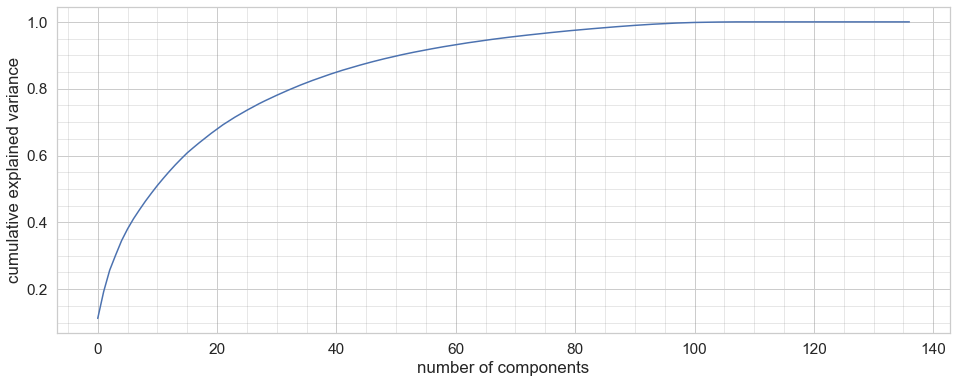

In [346]:
%matplotlib inline
fig = plt.figure(figsize = (16,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#888888', linestyle='-', alpha=0.2)
plt.show()

**Around 95% of variance can be explained by 60 features** <br>

<font color='blue'>
Hence selecting 60 features for modelling

In [347]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [348]:
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))  #fit transform operation
X_train_pca.shape

(21000, 60)

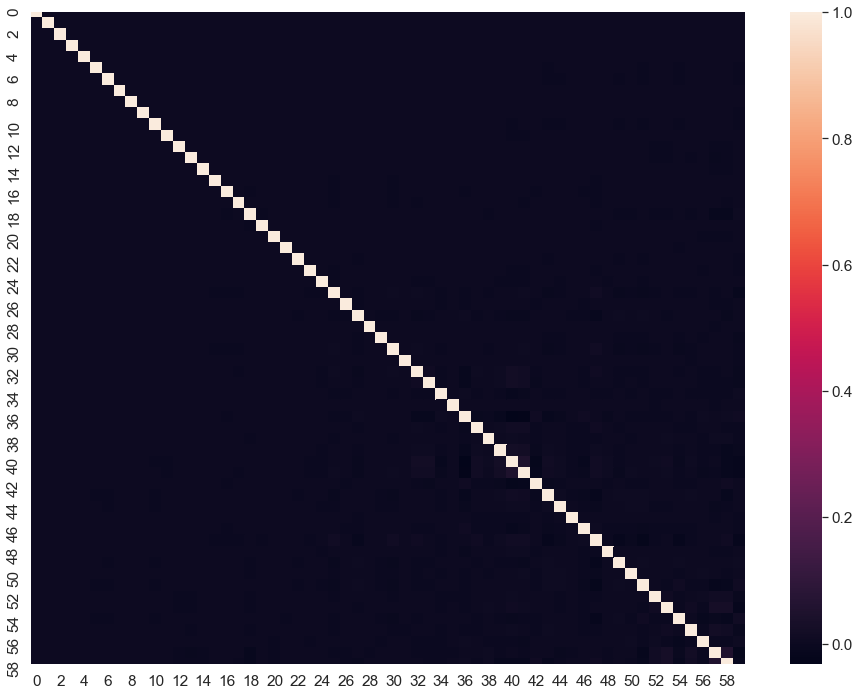

In [349]:
plt.figure(figsize=(16,12))
sns.heatmap(pd.DataFrame(X_train_pca).corr(),annot = False)  # Checking correlations

**There is no correlation between principal components**

<font color='blue'>
So we have successfully achieved Dimensionality reduction

In [350]:
#Applying selected components to the test data - 60 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 60)

<font color='blue'>

## Model M1   : Logistic Regression

In [351]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression  # to perform LR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score # Metrics to evaluate

lr = LogisticRegression(class_weight='balanced', random_state=100)
lr.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [352]:
# Making prediction on the test data
y_pred = lr.predict(X_test_pca)
y_pred[:5]

array([1, 0, 0, 0, 1], dtype=int64)

<font color='blue'>
Evaluation of the model : 

In [353]:
print("Accuracy:{}".format(accuracy_score(y_test,y_pred).round(3)))

Accuracy:0.818


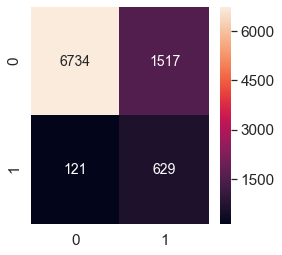

In [354]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
plt.figure(figsize = (4,4))
hm = sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
hm.set_ylim(2,0)  # to remove an error heatmap being cut at top and bottom.
plt.show()

In [355]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [356]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))

Sensitivity:0.839
Specificity:0.816


<font color='blue'>
Area under the curve / AUC Score for ROC curve :

In [357]:
pred_probs_test = lr.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test, pred_probs_test)))

AUC:0.89


In [358]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

<font color='blue'>

### ROC curve 

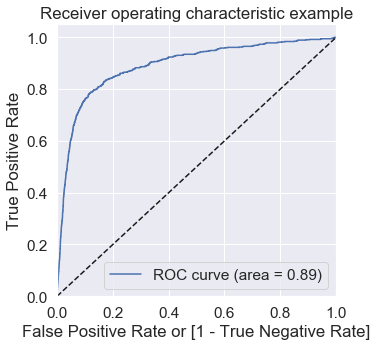

In [359]:
draw_roc(y_test, pred_probs_test)

<font color='blue'>

## Model M2 : Using Decision Tree

Let us start with a simple Decision tree with DEFAULT HYPERPARAMETERS :

In [360]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
dt_default = DecisionTreeClassifier(class_weight={0:0.08,1:0.92}, random_state=100)
dt_default.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [361]:
# Making predictions
y_pred = dt_default.predict(X_test_pca)

<font color='blue'>
    
   Evaluation of Model ---
   

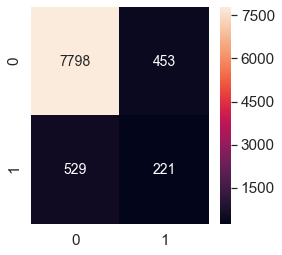

In [362]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
plt.figure(figsize = (4,4))
hm = sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
hm.set_ylim(2,0)  # to remove an error heatmap being cut at top and bottom.
plt.show()

In [363]:
# Confusion matrix
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [364]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.295
Specificity:0.945
Accuracy:0.891


<font color='blue'>
    
## Model M3 : Using Random forest

In [365]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.08,1:0.92}, random_state=100)

In [366]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [367]:
# Making predictions
y_pred = rfc.predict(X_test_pca)

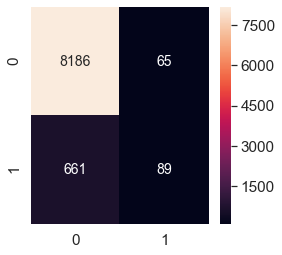

In [368]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
plt.figure(figsize = (4,4))
hm = sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
hm.set_ylim(2,0)  # to remove an error heatmap being cut at top and bottom.
plt.show()

In [369]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [370]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.119
Specificity:0.992
Accuracy:0.919


In [371]:
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test, pred_probs_test)))

AUC:0.81


<font color='blue'>

## Model M3-H : Random forest with Hyperparameter tuning :

Let us use gridsearch with scoring based on 'Recall' as we would like our model to identify maximum True Positives

In [372]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.08,1:0.92},random_state=100)
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='recall')

In [373]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
   

In [374]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.7528101152759707 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 200, 'n_estimators': 100}


<font color='blue'>
We have our best hyperparameters as :
    
- max depth  = 8
- max features = 10
- min samples per leaf = 300
- min samples for split = 200 &
- number of trees (n_estimators) = 300

In [375]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=8,
                             min_samples_leaf=300, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300,
                             class_weight={0:0.08,1:0.92},random_state=100)

In [376]:
rfc.fit(X_train_pca,y_train) #fit the model

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [377]:
# Making predictions
y_pred = rfc.predict(X_test_pca)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

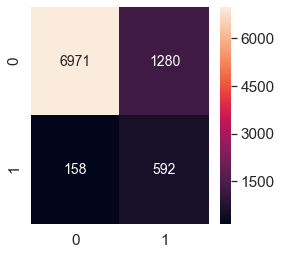

In [378]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
plt.figure(figsize = (4,4))
hm = sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
hm.set_ylim(2,0)  # to remove an error heatmap being cut at top and bottom.
plt.show()

In [379]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[6971 1280]
 [ 158  592]]



<font color='blue'>
Evaluation of Model based on metrics :

In [380]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.789
Specificity:0.845
Accuracy:0.84


In [381]:
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test, pred_probs_test)))

AUC:0.88


## Model Evaluation and Insights Summary

 <font color = blue>
 
        |-------------------------------|----------|-------------|
        | Model                         | Accuracy | Sensitivity |   
        |-------------------------------|----------|-------------|
        | Logistic Regression (M1)      | 82  %    |   84 %      |
        | Decision Tree (M2)            | 89  %    |   30 %      |
        | Random Forest (M3)            | 91  %    |   12 %      |
        | Tuned Random Forest (M3-H)    | 84  %    |   79 %      |
        |-------------------------------|----------|-------------|

In churn Model it is more important to identify churned customers i.e. focus has to be on "True Positives" and sensitivity is the ideal metric to determine that. 

A model that is 84 % sensitive will identify 84 % of churned customer. 
Hence Logistic regression is a better model as compared to others.

## Feature importance

<font color = blue> Let us identify the most important and influential predictors for the Churn process :

In [382]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.08,1:0.92})

In [383]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [384]:
# Making predictions
y_pred = rfc.predict(X_test)

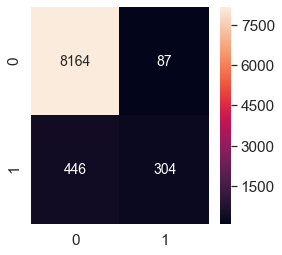

In [385]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
plt.figure(figsize = (4,4))
hm = sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
hm.set_ylim(2,0)  # to remove an error heatmap being cut at top and bottom.
plt.show()

In [386]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.789
Specificity:0.845
Accuracy:0.941


In [387]:
pred_probs_test = rfc.predict_proba(X_test)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test, pred_probs_test)))

AUC:0.87


In [388]:
# Print the name and gini importance of each feature
feat_labels = X_train.columns
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('arpu_6', 0.006428479663061084)
('arpu_7', 0.007461941145054508)
('arpu_8', 0.02263886613701322)
('onnet_mou_6', 0.0058135941513814595)
('onnet_mou_7', 0.004619412849356401)
('onnet_mou_8', 0.02063933010206956)
('offnet_mou_6', 0.00500359547971811)
('offnet_mou_7', 0.006207954768399313)
('offnet_mou_8', 0.04364007795103101)
('roam_ic_mou_6', 0.0017747183676957486)
('roam_ic_mou_7', 0.0016830525854002755)
('roam_ic_mou_8', 0.022898354170087416)
('roam_og_mou_6', 0.003411320167206013)
('roam_og_mou_7', 0.003018488058766769)
('roam_og_mou_8', 0.035712659188485305)
('loc_og_t2t_mou_6', 0.0048336313030484775)
('loc_og_t2t_mou_7', 0.005912343360744514)
('loc_og_t2t_mou_8', 0.006864309968155709)
('loc_og_t2m_mou_6', 0.005561479003447717)
('loc_og_t2m_mou_7', 0.006019809735766467)
('loc_og_t2m_mou_8', 0.03483928444126365)
('loc_og_t2f_mou_6', 0.0025911557714449066)
('loc_og_t2f_mou_7', 0.0026217290677747114)
('loc_og_t2f_mou_8', 0.004449775788405447)
('loc_og_t2c_mou_6', 0.0016064446370484865

In [389]:
feature_df = pd.concat([pd.Series(feat_labels),pd.Series(rfc.feature_importances_)],axis=1).rename(columns={0:'Features',1:'Weight'})
feature_df.head(10)

,Features,Weight
0,arpu_6,0.006428
1,arpu_7,0.007462
2,arpu_8,0.022639
3,onnet_mou_6,0.005814
4,onnet_mou_7,0.004619
5,onnet_mou_8,0.020639
6,offnet_mou_6,0.005004
7,offnet_mou_7,0.006208
8,offnet_mou_8,0.043640
9,roam_ic_mou_6,0.001775


In [390]:
top_10 = feature_df.sort_values('Weight',ascending=False).head(10) #sort based on weight in descending order
top_10

,Features,Weight
53,total_og_mou_8,0.068217
80,total_ic_mou_8,0.064893
56,loc_ic_t2t_mou_8,0.047340
29,loc_og_mou_8,0.045043
8,offnet_mou_8,0.043640
14,roam_og_mou_8,0.035713
20,loc_og_t2m_mou_8,0.034839
62,loc_ic_t2f_mou_8,0.033022
65,loc_ic_mou_8,0.024933
11,roam_ic_mou_8,0.022898


**Top 10 important features**

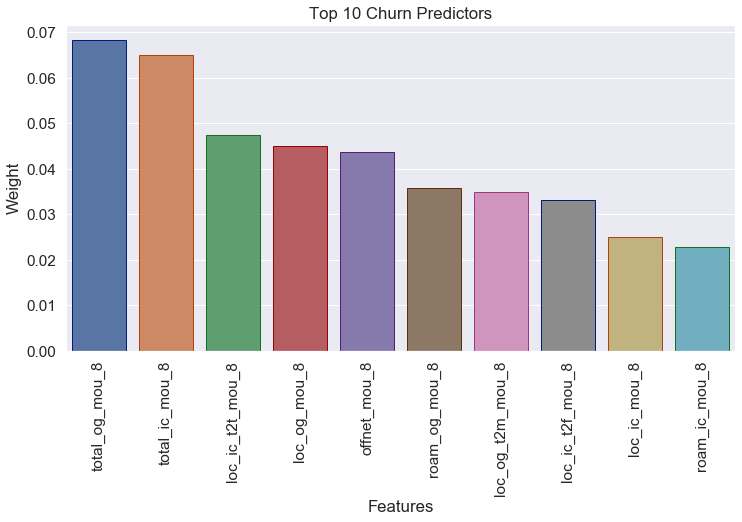

In [391]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data = top_10, x='Features', y='Weight',edgecolor=sns.color_palette('dark',7))
ax.set_title("Top 10 Churn Predictors")
plt.xticks(rotation=90)
plt.show()

<font color = blue>

# Insights :

## Important factors in deciding Churn are :
- Total incoming minutes of usage (MOU)
- Local incoming MOU
- Total recharge amount in the action phase

### A customer is less likely to churn if he/she is having a high footprint (eg. incoming calls, doing recharges etc)

#####  Recommendations:
- Create KPIs like MAU(monthly active users), RFM(Recency, frequency & monetary value) to track customers on a regular basis. 
- Launch personalized offers for customers having high churn possibility by taking help of above model.